## Case Study : Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img style="width:50%" src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [24]:
!pip install seaborn

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 1. Import Data

In [25]:

# Read in dataset
import pandas as pd

df = pd.read_csv("apps.csv")

# Drop duplicates
apps = df.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

# Print random sample of 5 entries
print (df.sample(5))


Total number of apps in the dataset =  9659
      Unnamed: 0                                      App            Category  \
4964        5954            Space Shooter : Galaxy Attack                GAME   
3996        4938                                Pocket AC         PHOTOGRAPHY   
4996        5988  British Columbia Tourist Places (Guide)    TRAVEL_AND_LOCAL   
5600        6625                           Blood pressure  HEALTH_AND_FITNESS   
6823        7882                 TUTORIAL CT SCAN CARDIAC             MEDICAL   

      Rating  Reviews  Size     Installs  Type  Price Content Rating  \
4964     4.6   169661   40M  10,000,000+  Free      0       Everyone   
3996     4.8      130  4.4M       1,000+  Paid  $9.99       Everyone   
4996     4.0        1  3.0M         100+  Free      0       Everyone   
5600     3.4     2256  1.6M     500,000+  Free      0       Everyone   
6823     NaN        1   15M       1,000+  Free      0       Everyone   

                Genres      Last Upd

There are 9659 different apps. The features have different data types such as datetime, factors, floats and strings.

## 2. Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns. Also it make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

In [26]:
chars_to_remove = [',', '+', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for i in cols_to_clean:
    for j in chars_to_remove:
        apps[i] = apps[i].str.replace(j, '')
    # Convert col to numeric
    apps[i] = pd.to_numeric(apps[i])


Not much has changed here in regards to the number of entries. We just cleaned up the data to make it easier to visualise later on. We did this by iterating through the columns we wanted to clean and replacing the character we want to remove. We then converted the string of numbers into numeric.

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

Number of categories =  33


<BarContainer object of 33 artists>

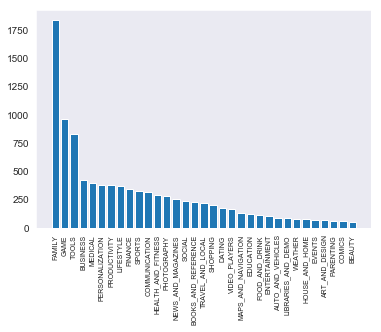

In [27]:
#import your favourite library for visualization
import matplotlib.pyplot as plt

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_cat = apps['Category'].value_counts()

# Plot any graph (bar,chart,line etc.) to show each category and its count for visualization

plt.rc('xtick', labelsize = 7)
plt.xticks(rotation = 90)
plt.bar(num_apps_in_cat.index, num_apps_in_cat.values)

The categories Family most amount of apps. Beauty has the least amount of apps. Game and Tools are also two of the top categories after Family.

## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>Add Histogram plot to visualize the distribution of app ratings</p>

Average app rating =  4.173243045387994


(array([ 16.,   0.,   1.,   0.,   0.,   3.,   3.,   4.,   8.,   0.,   8.,
         11.,  12.,   8.,   0.,  14.,  20.,  19.,  20.,   0.,  24.,  23.,
         40.,  45.,   0.,  81.,  69.,  63., 100.,   0., 126., 156., 167.,
        224., 286.,   0., 359., 513., 621.,   0., 810., 897., 895., 848.,
          0., 683., 442., 221.,  85., 271.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.68, 4.76, 4.84, 4.92, 5.  ]),
 <a list of 50 Patch objects>)

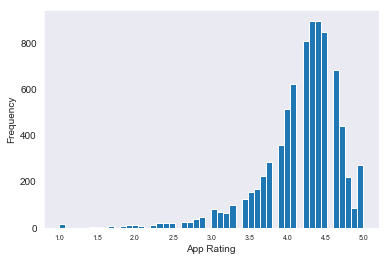

In [28]:
# Overall Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings using histogram. Write proper x axis and y axis labels.
x = apps['Rating']
plt.ylabel('Frequency')
plt.xlabel('App Rating')
plt.hist(x, bins=50, range = [1,5])

The average app rating is around 4.17. After plotting the histogram, we can see that it is skewed to the right. This means that most of the apps have a high rating.

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free/cheaper apps over paid apps? What price range do majoriy of apps fall into?</li>
</ul>

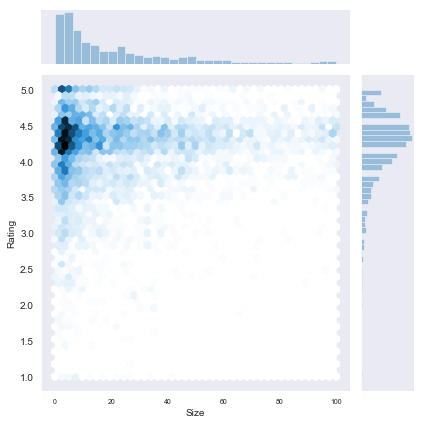

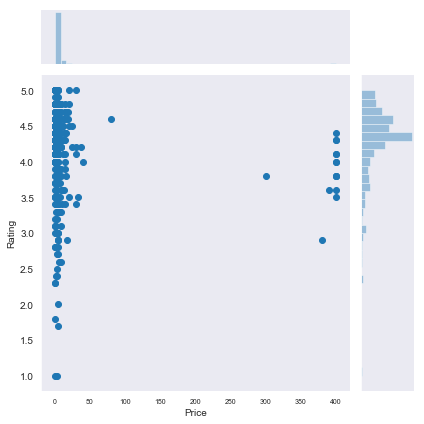

In [29]:
# Get the subset for categories with at least 250 apps
categories_250_apps = apps.groupby('Category').filter(lambda x: len(x) >= 250)


import seaborn as sns
sns.set_style("dark")


# Plot size vs. rating
sns.jointplot(x = categories_250_apps['Size'], y = categories_250_apps['Rating'], kind = 'hex')
 
# Subset for paid apps only
paidApps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
sns.jointplot(x = paidApps['Price'], y = paidApps['Rating'])

Does the size of an app affect its rating?

-Apps rated 4.0 and above are mostly under 20 MBs. So that shows a correlation that light weighted apps have a higher rating on average as compared to heavy apps.

Do users really care about system-heavy apps or do they prefer light-weighted apps?

-Users seem to prefer light-weighted apps more as seen by the rating.

Does the price of an app affect its rating?

-Apps priced higher do not have drastically low ratings. However, they dont necessarilly have high ratings either. So it's safe to say that the price doesnt have that much affect on the rating. But it can be noted that the top rated apps are mostly under 50 USD.

Do users always prefer free/cheaper apps over paid apps? What price range do majoriy of apps fall into?

-Most Apps are free to 30 USD even the top rated ones so it can deduced that users prefer free and cheaper apps.
We can see that most of the apps (especially the top rated ones) are less then 50USD with only handful above 300USD . As for the size.

## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.
<ul>
<li>What is the maximum price for GAME category. What is the average price of paid GAME category? </li>
<ul>

Max_Game_Price =  17.99
Avg_Game_Price =  0.29646506777893633


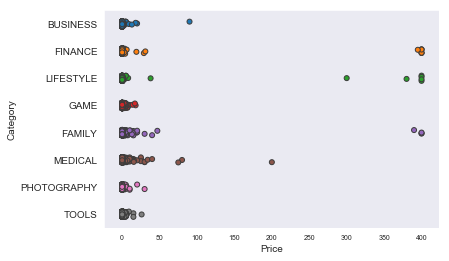

In [30]:
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
import matplotlib.pyplot as plt


# Examine and plot the price trend for the above categories
#plt.rc('xtick', labelsize = 7)
#plt.xticks(rotation = 90)

#plt.scatter(popular_app_cats['Category'], popular_app_cats['Price']) 


sns.stripplot(x= "Price", y= "Category" , data= popular_app_cats,
                   jitter=True, linewidth=1 )


# Examine GAME Category. What is the maximum price for GAME category. What is the average price of paid GAME category?
game_apps = apps[apps.Category.isin(['GAME'])]
print('Max_Game_Price = ', game_apps.Price.max())
print('Avg_Game_Price = ', game_apps.Price.mean())




## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.

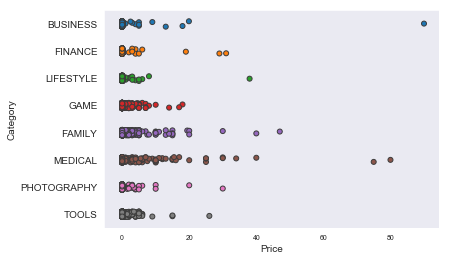

In [31]:
import seaborn as sns
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Category, Name and Price of apps priced above $100 which will be considered as Junk apps.
Junk_Apps = popular_app_cats[popular_app_cats['Price']>100]

# Select apps priced below $100 which will be considered as authentic apps.
Authentic_Apps = popular_app_cats[popular_app_cats['Price']<100]


# Examine and visualize price vs category with the authentic apps. You can use strip  plot or box plot
sns.stripplot(x= "Price", y= "Category" , data= Authentic_Apps,
                   jitter=True, linewidth=1 )

Most of the authentic apps are less than 20USD with only a few medical and business apps priced around 50USD. 

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps are installed as much as free apps?

{'whiskers': [<matplotlib.lines.Line2D at 0x20d99186438>,
 'caps': [<matplotlib.lines.Line2D at 0x20d991682e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d991866a0>,
 'medians': [<matplotlib.lines.Line2D at 0x20d99157da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20d991576a0>,
 'means': []}

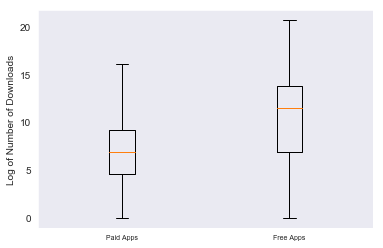

In [32]:
# Visualize Number of downloads of paid apps vs. free apps. Hint (convert number of downloads to log in order to scale down actual value)
# Box plot is preferred.
import numpy as np

paid_Apps = apps[apps.Type.isin(['Paid'])]

free_Apps = apps[apps.Type.isin(['Free'])]

log_paid = np.log(paid_Apps['Installs'])

log_free = np.log(free_Apps['Installs'])

labels = ['Paid Apps', 'Free Apps']
plt.ylabel('Log of Number of Downloads')
plt.boxplot([log_paid, log_free], notch=None, labels = labels)

It can be seen that the Paid apps have a low number of downloads compared to the Free apps. However the downloads for Paid apps is still alot. Max log downloads for Free apps is above 20 and for Paid apps its a

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>Sentiment polarity defines sentiment with a range from +1 to -1 (+1 being positive, -1 being negative and 0 being neutral)</p>
<p>What is the sentiment trend of user reviews for paid and free apps?</p>


{'whiskers': [<matplotlib.lines.Line2D at 0x20d991126d8>,
 'caps': [<matplotlib.lines.Line2D at 0x20da51ec240>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d99112be0>,
 'medians': [<matplotlib.lines.Line2D at 0x20da51ec2e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x20da5053d68>,
 'means': []}

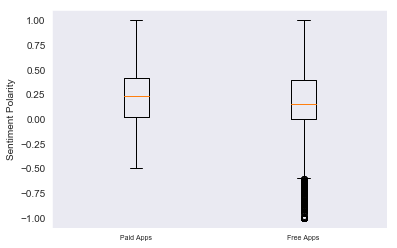

In [33]:
# Load user_reviews.csv
reviews = pd.read_csv('user_reviews.csv')
#reviews.head()
# Join and merge the two dataframe apps and user_reviews. Drop NA values from Sentiment and Translated_Review columns
apps_reviews = pd.merge(apps, reviews, on = 'App', how = 'inner')
apps_reviews = apps_reviews.dropna(subset=['Sentiment', 'Translated_Review'])


# Visualize user review sentiment polarity for paid vs. free apps. Hint (use Box plot for better visualization and analysis)

paid_Apps = apps_reviews[apps_reviews.Type.isin(['Paid'])]

free_Apps = apps_reviews[apps_reviews.Type.isin(['Free'])]

Sentiment_paid = paid_Apps['Sentiment_Polarity']

Sentiment_free = free_Apps['Sentiment_Polarity']


labels = ['Paid Apps', 'Free Apps']
plt.ylabel('Sentiment Polarity')
plt.boxplot([Sentiment_paid, Sentiment_free] , False, labels = labels)

It can be observed that free apps has more negative feedback than paid apps since it has more outliers on the negative Y axis. Paid Apps have more stable reviews which means the app quality is relatively consistent. The median for Paid apps is 0.25 while the median for Free apps is lower, around 0.15.